In [2]:
from qsweepy import *
from qsweepy.instruments import *

import matplotlib.pyplot as plt

In [2]:
adc = instruments.Spectrum_M4i22xx('adc')

In [3]:
CHASSIS = 0
SLOT_AWG1 = 4
SLOT_AWG2 = 5
awg1 = Keysight_M3202A_S('awg1', CHASSIS, SLOT_AWG1)
awg2 = Keysight_M3202A_S('awg2', CHASSIS, SLOT_AWG2)

In [4]:
adc._spcm_win32.spcm_dwGetContBuf_i64?

In [5]:
awg1.set_clock_output(True)
awg2.set_clock_output(True)
awg1.set_clock(625e6)
awg2.set_clock(625e6)

In [6]:
# channel 0 is master and triggers all others
awg1.trigger_source_types = [6, 6,6,6] #Trigger source (soft,hard etc) 6  external per cycle, 0 -soft (from PC)
awg1.trigger_source_channels = [4000, 4000,4000,4000] #External trigger source. 0 means PXI trigger, 4000+
awg1.trigger_delays = [0, 0,0,0] # master channel should wait 400 ns for others to start
awg1.trigger_behaviours = [4,4,4,4] #Rising/Falling edge etc 4 - Falling

In [13]:
wf = np.sin(np.linspace(-np.pi,np.pi,awg1.get_nop(), endpoint=False)*100)*np.sin(np.linspace(-np.pi,np.pi,awg1.get_nop(), endpoint=False)*200)
wf_d = np.asarray(wf).tolist()
awg2.trigger_source_types = [6,6,6,6]
awg2.trigger_source_channels = [4000, 4000,4000,4000]
awg2.trigger_delays = [0, 0,0,0]
awg2.trigger_behaviours = [4,4,4,4]
awg1.trigger_source_types = [0,6,6,6]
awg1.trigger_source_channels = [0, 4000,4000,4000]
awg1.trigger_delays = [40, 0,0,0]
awg1.trigger_behaviours = [0,4,4,4]

for channel in range(0,4):
    awg2.set_amplitude(0.2, channel=channel)
    awg2.set_offset(0,channel=channel)
    awg2.set_output(1, channel=channel)
    awg2.set_waveform(waveform = wf_d, channel=channel)
for channel in range(0,4):
    awg1.set_amplitude(0.2, channel=channel)
    awg1.set_offset(0,channel=channel)
    awg1.set_output(1, channel=channel)
    awg1.set_waveform(waveform = wf_d, channel=channel)
awg2.set_marker(length=100, delay=0, channel=0)
awg2.set_trigger_mode(2)
awg2.run()
awg1.run()

In [4]:
awg1.get_offset(1)

0.2

In [8]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [24]:
plt.plot(wf_d)

In [9]:
adc.set_timeout(1000)
adc.get_timeout()

1000

In [10]:
#Внутренний clock, без триггера
adc.reset()
#Установить sample rate
adc.set_clock(625e6)
adc.set_clock_mode('ext')
adc.set_ext_clock(625e6)
#Выбрать канал (оба)
adc.select_channel01()

adc.set_trigger_ext0_level0(0) # logical 0 value to 200 mV
adc.set_trigger_ext0_level1(1300) # logical 1 value to 600 mV
adc.trigger_mode_pos()
adc.set_trigger_ext0_pulsewidth(0)

adc.set_trigger_ext0()
adc.set_trigger_termination(1)
#Сегментированный режим
#adc.set_multi_mode()
#Настроить входнй диапазон в мв
#adc.init_channel01_multiple_recording()
#Настроить режим измерения
adc.set_multi_record_mode()
adc.set_nop(1024)
adc.set_nums(20000)
adc.set_posttrigger(1024-32)
adc._buffer_setup()
#Померить
#adc.start()
#Получить данные
#daq_buf = adc.get_data()
#adc.stop()

In [11]:
%time data = adc.measure()

ERROR:root:Spectrum_M4i22xx : Error 268 while setting reg 100 to 147468
ERROR:root:Spectrum_M4i22xx : Call: (SPC_M2CMD, M2CMD_CARD_START | M2CMD_CARD_ENABLETRIGGER | M2CMD_CARD_WAITREADY | M2CMD_DATA_WAITDMA) -> clock section not locked: perhaps no external clock signal connected or not stable        


ValueError: Error communicating with device

In [35]:
#data['Voltage'].shape
data

{'Voltage': array([[ 0.+0.j, -2.-3.j,  3.+0.j, ...,  0.-1.j, -4.-2.j,  1.+3.j],
        [-3.-1.j, -3.+0.j, -2.-3.j, ..., -1.+1.j,  2.+0.j, -3.-1.j],
        [ 3.+1.j,  3.-4.j,  4.+1.j, ..., -3.+0.j, -3.+0.j, -2.+2.j],
        ...,
        [-2.-1.j,  0.-3.j,  1.-2.j, ...,  5.+4.j,  1.+3.j, -2.+1.j],
        [ 1.+1.j,  1.-2.j,  1.-2.j, ...,  1.+3.j,  2.+0.j,  0.+4.j],
        [-1.+0.j, -2.+1.j,  1.+0.j, ..., -1.+0.j,  0.+3.j,  3.+0.j]])}

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


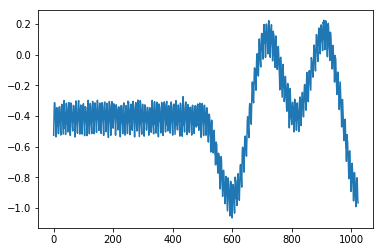

In [36]:
plt.plot(np.mean(data['Voltage'], axis=0))

In [12]:
%matplotlib qt5
plt.plot(data['Voltage'][0])
plt.plot(data1['Voltage'][0])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [16]:
adc._buffer_setup()

In [14]:
adc.start()

In [15]:
data = adc.get_data()

In [17]:
%matplotlib
plt.plot(data[0][0])
plt.plot(data[0][1])

Using matplotlib backend: Qt5Agg


In [14]:
adc._set_param(SPC_SEGMENTSIZE,4096)
adc._set_param(SPC_POSTTRIGGER,4096-32)

0

In [15]:
adc.start()

In [20]:
len(adc.measure()['Voltage'])

10

In [21]:
data.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [22]:
import numpy as np
%matplotlib
data = adc.measure()['Voltage']
data_re = [np.real(i) for i in data[0]]
data_im = [np.imag(i) for i in data[0]]
plt.plot(data_re)
plt.plot(data_im)

Using matplotlib backend: Qt5Agg
